# *Data Acquisition*

In [ ]:
import pandas as pd

# Import data
dataset = pd.read_csv('train.csv')
dataset

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0


In [ ]:
# Jumlah baris dan kolom pada data
dataset.shape

(54808, 13)

In [ ]:
# Informasi data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


# *Data Cleansing*

## Konversi Tipe Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Mengubah tipe data categorical menjadi numerik
dataset['department'] = label_encoder.fit_transform(dataset['department'])
dataset['region'] = label_encoder.fit_transform(dataset['region'])
dataset['education'] = label_encoder.fit_transform(dataset['education'])
dataset['gender'] = label_encoder.fit_transform(dataset['gender'])
dataset['recruitment_channel'] = label_encoder.fit_transform(dataset['recruitment_channel'])

dataset.dtypes

employee_id               int64
department                int64
region                    int64
education                 int64
gender                    int64
recruitment_channel       int64
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

## *Missing Values*

In [ ]:
# Cek missing values
dataset.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
# Handling missing values

# Menghapus missing values
# dataset = dataset.dropna()

# Mengisi nilai hilang dengan nilai nol
dataset = dataset.fillna(0)

# Mengisi missing values dengan nilai rata-rata
# dataset = dataset.fillna(dataset.mean())

# Cek missing values setelah handling missing values
dataset.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

## *Outlier*

In [ ]:
# Cek unique values pada kolom atribut dataset
for i in dataset.columns:
    print('unique values in "{}":\n'.format(i),dataset[i].unique())

unique values in "employee_id":
 [65438 65141  7513 ... 13918 13614 51526]
unique values in "department":
 [7 4 8 0 6 5 1 2 3]
unique values in "region":
 [31 14 10 15 18 11 12 27  0 28 21 24  6  5  2 29 20  8  4  7 17  1 19 23
  3 13 32 25 30 26 16 22 33  9]
unique values in "education":
 [2 0 3 1]
unique values in "gender":
 [0 1]
unique values in "recruitment_channel":
 [2 0 1]
unique values in "no_of_trainings":
 [ 1  2  3  4  7  5  6  8 10  9]
unique values in "age":
 [35 30 34 39 45 31 33 28 32 49 37 38 41 27 29 26 24 57 40 42 23 59 44 50
 56 20 25 47 36 46 60 43 22 54 58 48 53 55 51 52 21]
unique values in "previous_year_rating":
 [5. 3. 1. 4. 0. 2.]
unique values in "length_of_service":
 [ 8  4  7 10  2  5  6  1  3 16  9 11 26 12 17 14 13 19 15 23 18 20 22 25
 28 24 31 21 29 30 34 27 33 32 37]
unique values in "awards_won?":
 [0 1]
unique values in "avg_training_score":
 [49 60 50 73 85 59 63 83 54 77 80 84 51 46 75 57 70 68 79 44 72 61 48 58
 87 47 52 88 71 65 62 53 78 91 82 6

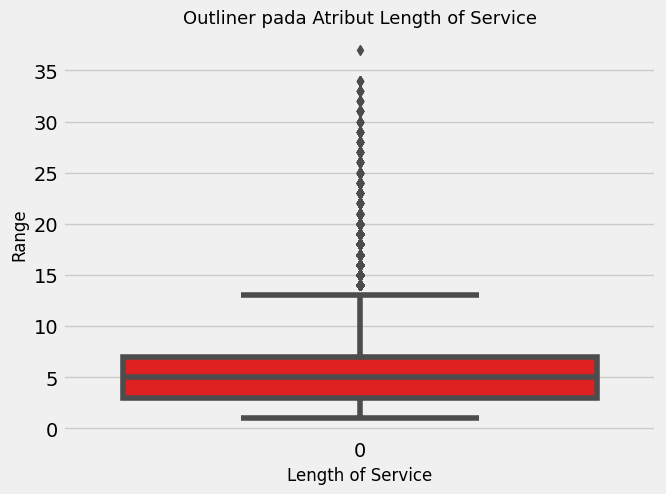

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cek outliers
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Boxplot untuk atribut length of service
plt.subplot(1, 2, 1)
sns.boxplot(dataset['length_of_service'], color = 'red')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)
plt.title('Outliner pada Atribut Length of Service', fontsize = 13)

plt.show()

### *IQR*

In [ ]:
# Fungsi untuk mengatasi outlier dengan metode IQR
def atasi_outlier_iqr(dataframe, kolom):
    Q1 = dataframe[kolom].quantile(0.25)
    Q3 = dataframe[kolom].quantile(0.75)
    IQR = Q3 - Q1

    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    dataframe_tanpa_outlier = dataframe[(dataframe[kolom] >= batas_bawah) & (dataframe[kolom] <= batas_atas)]

    return dataframe_tanpa_outlier

# Mengatasi outlier pada kolom atribut 'length_of_service'
dataset = atasi_outlier_iqr(dataset, 'length_of_service')

# Tampilkan hasil
print("Dataset tanpa outlier:")
dataset

Dataset tanpa outlier:


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,6915,7,5,0,1,0,2,31,1.0,2,0,49,0
54804,74592,4,19,2,0,0,1,37,2.0,6,0,56,0
54805,13918,0,0,0,1,0,1,27,5.0,3,0,79,0
54806,13614,7,33,3,1,2,1,29,1.0,2,0,45,0


### *Z-Score*

In [ ]:
# import numpy as np
# from scipy import stats

# # Fungsi untuk mengatasi outlier dengan metode Z-Score
# def atasi_outlier_zscore(dataframe, kolom, threshold=3):
#     z_scores = np.abs(stats.zscore(dataframe[kolom]))
#     dataframe_tanpa_outlier = dataframe[(z_scores < threshold)]

#     return dataframe_tanpa_outlier

# # Mengatasi outlier dalam kolom 'Nilai' dengan threshold default 3
# dataset = atasi_outlier_zscore(dataset, 'length_of_service')

# # Tampilkan hasil
# print("Dataset tanpa outlier:")
# dataset

In [ ]:
# Cek unique values pada kolom atribut dataset setelah handling outlier
for i in dataset.columns:
    print('unique values in "{}":\n'.format(i),dataset[i].unique())

unique values in "employee_id":
 [65438 65141  7513 ... 13918 13614 51526]
unique values in "department":
 [7 4 8 0 6 5 1 2 3]
unique values in "region":
 [31 14 10 15 18 11 12 27  0 28 24  6  5  2 29 20  8  4  7 17 21  1 19 23
  3 13 32 25 30 26 16 22 33  9]
unique values in "education":
 [2 0 3 1]
unique values in "gender":
 [0 1]
unique values in "recruitment_channel":
 [2 0 1]
unique values in "no_of_trainings":
 [ 1  2  3  4  7  5  6  8 10  9]
unique values in "age":
 [35 30 34 39 45 31 33 28 32 49 37 38 41 27 29 26 24 57 40 42 23 44 50 56
 20 25 47 36 46 43 22 54 58 48 53 60 59 51 52 55 21]
unique values in "previous_year_rating":
 [5. 3. 1. 4. 0. 2.]
unique values in "length_of_service":
 [ 8  4  7 10  2  5  6  1  3  9 11 12 13]
unique values in "awards_won?":
 [0 1]
unique values in "avg_training_score":
 [49 60 50 73 85 59 63 83 54 77 84 51 46 75 57 70 68 79 80 44 72 61 48 58
 87 47 88 71 65 62 52 53 78 91 82 69 55 74 86 90 92 67 89 56 76 81 45 64
 39 94 93 66 95 42 96 99 43 4

## Data Duplikat

In [ ]:
# Cek data duplikat
dataset.duplicated().sum()

0

## Normalisasi Data

### *Min-Max Scaler*

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# # Memisahkan fitur dan target
# X = dataset.drop('is_promoted', axis=1)
# y = dataset['is_promoted']

# # Memilih fitur yang ingin dinormalisasi
# dataset = pd.DataFrame(X)

# # Membuat objek MinMaxScaler
# scaler = MinMaxScaler()

# # Melakukan normalisasi Min-Max
# normalized_data = scaler.fit_transform(dataset)

# # Mengonversi hasil normalisasi kembali ke DataFrame
# X_Normalized = pd.DataFrame(normalized_data, columns=dataset.columns)

### *Standard Scaler*

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Memisahkan fitur dan target
# X = dataset.drop('is_promoted', axis=1)
# y = dataset['is_promoted']

# # Memilih fitur yang ingin dinormalisasi
# dataset = pd.DataFrame(X)

# # Membuat objek StandardScaler
# scaler = StandardScaler()

# # Melakukan normalisasi Standard Scaler
# normalized_data = scaler.fit_transform(dataset)

# # Mengonversi hasil normalisasi kembali ke DataFrame
# X_Normalized = pd.DataFrame(normalized_data, columns=dataset.columns)

### *Robust Scaler*

In [ ]:
from sklearn.preprocessing import RobustScaler

# Memisahkan fitur dan target
X = dataset.drop('is_promoted', axis=1)
y = dataset['is_promoted']

# Memilih fitur yang ingin dinormalisasi
dataset = pd.DataFrame(X)

# Membuat objek RobustScaler
scaler = RobustScaler()

# Melakukan normalisasi Robust
normalized_data = scaler.fit_transform(dataset)

# Mengonversi hasil normalisasi kembali ke DataFrame
X_Normalized = pd.DataFrame(normalized_data, columns=dataset.columns)

# *Feature Engineering*

## *Data Balancing*

In [ ]:
# Menghitung jumlah sampel pada kelas target
class_counts = y.value_counts()

# Menampilkan jumlah sampel pada setiap kelas
print(class_counts)

0    46885
1     4434
Name: is_promoted, dtype: int64


### *SMOTE*

In [ ]:
from imblearn.over_sampling import SMOTE

# Buat objek SMOTE
smote = SMOTE()

# Lakukan SMOTE pada data
X_resampled, y_resampled = smote.fit_resample(X_Normalized, y)

# Menampilkan perbandingan jumlah sampel setelah penerapan SMOTE
print('Sebelum Diseimbangkan:')
print(y.value_counts())
print('Setelah Diseimbangkan:')
print(y_resampled.value_counts())

Sebelum Diseimbangkan:
0    46885
1     4434
Name: is_promoted, dtype: int64
Setelah Diseimbangkan:
0    46885
1    46885
Name: is_promoted, dtype: int64


### *Random Over Sampling*

In [ ]:
# from imblearn.over_sampling import RandomOverSampler

# # Buat objek Random Over Sampling
# ros = RandomOverSampler(random_state=42)

# # Lakukan Random Over Sampling pada data
# X_resampled, y_resampled = ros.fit_resample(X_Normalized, y)

# # Menampilkan perbandingan jumlah sampel setelah penerapan Random Over Sampling
# print('Sebelum Diseimbangkan:')
# print(y.value_counts())
# print('Setelah Diseimbangkan:')
# print(y_resampled.value_counts())

### *Random Under Sampling*

In [ ]:
# from imblearn.under_sampling import RandomUnderSampler

# # Buat objek Random Under Sampling
# rus = RandomUnderSampler(random_state=42)

# # Lakukan Random Under Sampling pada data
# X_resampled, y_resampled = rus.fit_resample(X_Normalized, y)

# # Menampilkan perbandingan jumlah sampel setelah penerapan Random Under Sampling
# print('Sebelum Diseimbangkan:')
# print(y.value_counts())
# print('Setelah Diseimbangkan:')
# print(y_resampled.value_counts())

## *Feature Selection*

### *Feature Importances*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Memisahkan fitur dan target
X = X_resampled
y = y_resampled

# Membuat model klasifikasi
model = RandomForestClassifier()

# Melatih model pada data
model.fit(X, y)

# Melakukan seleksi fitur dengan feature importance
atribut = dataset.columns
seleksi_fitur = model.feature_importances_
featureIndexesByImportance = seleksi_fitur.argsort()
for index in featureIndexesByImportance:
  print('{}: {:.2f}%'.format(atribut[index], (seleksi_fitur[index] *100.0)))

gender: 1.72%
no_of_trainings: 2.22%
recruitment_channel: 2.28%
education: 2.45%
awards_won?: 3.58%
employee_id: 8.36%
department: 9.25%
region: 9.76%
age: 9.84%
length_of_service: 10.25%
previous_year_rating: 18.75%
avg_training_score: 21.54%


In [ ]:
# Menghapus atribut yang memiliki pengaruh paling rendah
dataset = dataset.drop(['gender', 'recruitment_channel', 'no_of_trainings'], axis=1)
dataset.columns.tolist()

['employee_id',
 'department',
 'region',
 'education',
 'age',
 'previous_year_rating',
 'length_of_service',
 'awards_won?',
 'avg_training_score']

### *RFE*

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier

# # # Memisahkan fitur dan target
# X = X_resampled
# y = y_resampled

# # Melakukan seleksi fitur dengan rfe
# modelRF = RandomForestClassifier()
# rfe = RFE(estimator=modelRF, n_features_to_select=12)
# rfe = rfe.fit(X, y)
# print(rfe.support_)
# print('\n', rfe.ranking_)
# print('\n', rfe.get_feature_names_out(input_features=None))

In [ ]:
# # Menghapus atribut yang memiliki pengaruh paling rendah
# dataset = dataset.drop(['gender', 'recruitment_channel', 'no_of_trainings'], axis=1)
# dataset.columns.tolist()

# *Data Split*

### *Cross Validation*

In [ ]:
# from sklearn.model_selection import KFold

# kf = KFold(n_splits=10, shuffle=True, random_state=42)

# # Bagi data menjadi data training dan data testing
# for train_index, test_index in kf.split(X):
#   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#   y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)
cnt = 1

# Bagi data menjadi data training dan data testing
for train_index, test_index in kf.split(X, y):
  print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set: {len(test_index)}')
  cnt += 1

  # X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  # y_train, y_test = y.iloc[train_index], y.iloc[test_index]

Fold:1, Train set: 84393, Test set: 9377
Fold:2, Train set: 84393, Test set: 9377
Fold:3, Train set: 84393, Test set: 9377
Fold:4, Train set: 84393, Test set: 9377
Fold:5, Train set: 84393, Test set: 9377
Fold:6, Train set: 84393, Test set: 9377
Fold:7, Train set: 84393, Test set: 9377
Fold:8, Train set: 84393, Test set: 9377
Fold:9, Train set: 84393, Test set: 9377
Fold:10, Train set: 84393, Test set: 9377


### Split Data Dengan Rasio

In [ ]:
# from sklearn.model_selection import train_test_split

# # Bagi data menjadi data training dan data testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Menampilkan ukuran data training dan data test
# print("Ukuran Data Training:", X_train.shape)
# print("Ukuran Data Test:", X_test.shape)

# *Model Training*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Inisialisasi model KNN
knn = KNeighborsClassifier(n_neighbors=2)

# Latih model KNN pada data latih
knn.fit(X_train, y_train)

# Menampilkan nilai akurasi model
print('Akurasi: {:.3f}'.format(accuracy_score(y_test, knn.predict(X_test))))

Akurasi: 0.939


# *Model Evaluation*

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Melakukan prediksi pada data uji
y_pred = knn.predict(X_test)

# Menghitung metrik evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Menampilkan metrik evaluasi model
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9393196118161459
Precision: 0.9088669950738916
Recall: 0.9725455743465846


## *Confusion Matrix*

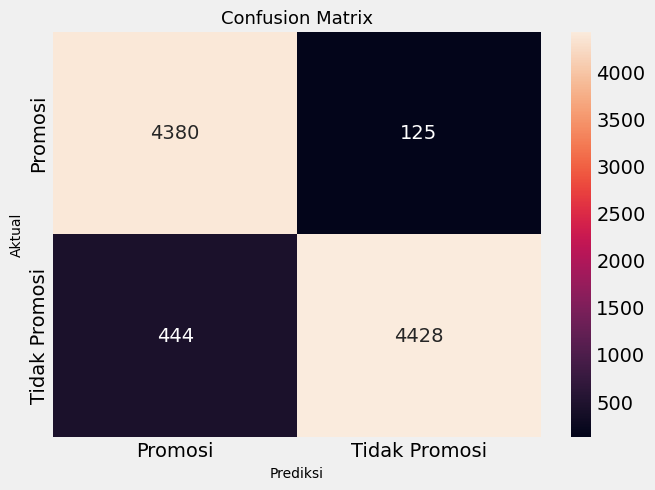

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

# Menghitung confusion matrix
confusion_mat = confusion_matrix(y_pred, y_test)

# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_mat, annot=True, fmt="d",
            xticklabels = ['Promosi', 'Tidak Promosi'],
            yticklabels = ['Promosi', 'Tidak Promosi'])
plt.ylabel('Aktual', fontsize=10)
plt.xlabel('Prediksi', fontsize=10)
plt.title('Confusion Matrix', fontsize=13)
plt.show()

## Kurva *ROC*(*AUC*)

AUC Score: 0.9402528866757799


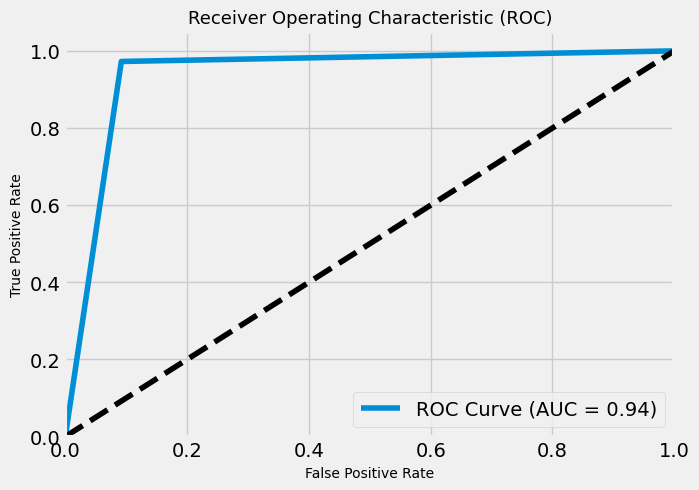

In [ ]:
# Menghitung AUC
auc_score = roc_auc_score(y_test, y_pred)
print("AUC Score:", auc_score)

# Menghitung nilai false positive rate (FPR) dan true positive rate (TPR) untuk ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Membuat plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=13)
plt.legend(loc="lower right")
plt.show()

In [ ]:
dataset

,employee_id,department,region,education,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,65438,7,31,2,35,5.0,8,0,49
1,65141,4,14,0,30,5.0,4,0,60
2,7513,7,10,0,34,3.0,7,0,50
3,2542,7,15,0,39,1.0,10,0,50
4,48945,8,18,0,45,3.0,2,0,73
...,...,...,...,...,...,...,...,...,...
54802,6915,7,5,0,31,1.0,2,0,49
54804,74592,4,19,2,37,2.0,6,0,56
54805,13918,0,0,0,27,5.0,3,0,79
54806,13614,7,33,3,29,1.0,2,0,45


# Perbandingan Algoritma dengan Penelitian sebelumnya (berdasarkan *ROC*/*AUC*)

## *Decision Tree*

In [ ]:
# from sklearn.tree import DecisionTreeClassifier, export_graphviz

# DT = DecisionTreeClassifier(random_state=42)
# DT.fit(X_train, y_train)

# print('Decision Tree Accuracy: {:.3f}'.format(accuracy_score(y_test, DT.predict(X_test))))

In [ ]:
# # Menghitung AUC
# auc_score = roc_auc_score(y_test, DT.predict(X_test))
# print("AUC Score:", auc_score)

# # Menghitung nilai false positive rate (FPR) dan true positive rate (TPR) untuk ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, DT.predict_proba(X_test)[:,1])

# # Membuat plot ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate', fontsize=13)
# plt.ylabel('True Positive Rate', fontsize=13)
# plt.title('Receiver Operating Characteristic (ROC)', fontsize=15)
# plt.legend(loc="lower right")
# plt.show()

## *Naive Bayes*

In [ ]:
# from sklearn.naive_bayes import GaussianNB

# NB = GaussianNB()
# NB.fit(X_train, y_train)

# print('Naive Bayes Accuracy: {:.3f}'.format(accuracy_score(y_test, NB.predict(X_test))))

In [ ]:
# # Menghitung AUC
# auc_score = roc_auc_score(y_test, NB.predict(X_test))
# print("AUC Score:", auc_score)

# # Menghitung nilai false positive rate (FPR) dan true positive rate (TPR) untuk ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, NB.predict_proba(X_test)[:,1])

# # Membuat plot ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate', fontsize=13)
# plt.ylabel('True Positive Rate', fontsize=13)
# plt.title('Receiver Operating Characteristic (ROC)', fontsize=15)
# plt.legend(loc="lower right")
# plt.show()

## *Support Vector Machine* (*SVM*)

In [ ]:
# from sklearn.svm import SVC

# svm = SVC(kernel='linear', random_state=42, probability=True)
# svm.fit(X_train, y_train)

# print('Support Vector Machine Accuracy: {:.3f}'.format(accuracy_score(y_test, svm.predict(X_test))))

In [ ]:
# # Menghitung AUC
# auc_score = roc_auc_score(y_test, svm.predict(X_test))
# print("AUC Score:", auc_score)

# # Menghitung nilai false positive rate (FPR) dan true positive rate (TPR) untuk ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:,1])

# # Membuat plot ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate', fontsize=13)
# plt.ylabel('True Positive Rate', fontsize=13)
# plt.title('Receiver Operating Characteristic (ROC)', fontsize=15)
# plt.legend(loc="lower right")
# plt.show()

## *Logistic Regression*

In [ ]:
# from sklearn.linear_model import LogisticRegression

# LR = LogisticRegression(solver='newton-cg', random_state=42)
# LR.fit(X_train, y_train)

# print('Logistic Reegression Accuracy: {:.3f}'.format(accuracy_score(y_test, LR.predict(X_test))))

In [ ]:
# # Menghitung AUC
# auc_score = roc_auc_score(y_test, LR.predict(X_test))
# print("AUC Score:", auc_score)

# # Menghitung nilai false positive rate (FPR) dan true positive rate (TPR) untuk ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1])

# # Membuat plot ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate', fontsize=13)
# plt.ylabel('True Positive Rate', fontsize=13)
# plt.title('Receiver Operating Characteristic (ROC)', fontsize=15)
# plt.legend(loc="lower right")
# plt.show()